## Correlation of COVID-19 cases in the states of Mexico by population density (inhabitants per square kilometer)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

#### Import COVID-19 cases data

In [2]:
dfcvcases = pd.read_csv('../Data/week1analyzes.csv')
dfcvcases.head()

,state,population,total_cases,cases_rates,total_cases_last_60_days,cases_rate_last_60_days,total_deaths,deaths_rates,total_deaths_last_60_days,deaths_rate_last_60_days
0,AGUASCALIENTES,1434635,26695,1860.752038,828,57.715029,2456,171.193370,88,6.133964
1,BAJA CALIFORNIA,3634868,50286,1383.434006,2403,66.109691,8648,237.917856,177,4.869503
2,BAJA CALIFORNIA SUR,804708,36317,4513.065609,6423,798.177724,1486,184.663257,118,14.663704
3,CAMPECHE,1000617,11099,1109.215614,1666,166.497271,1266,126.521936,58,5.796424
4,CHIAPAS,5730367,12063,210.510077,1129,19.702054,1655,28.881222,43,0.750388


#### Import population density data

In [3]:
dfpdensity = pd.read_excel('../Data/Población_07.xlsx', skiprows = range(0, 3), nrows =32)
dfpdensity.head()

,Entidad federativa,2020
0,Aguascalientes,253.9
1,Baja California,52.8
2,Baja California Sur,10.8
3,Campeche,16.1
4,Coahuila de Zaragoza,20.8


In [4]:
dfpdensity.rename(columns={'Entidad federativa': 'state', '2020': 'population_density_2020'}, inplace=True)


In [5]:
dfpdensity.head()

,state,population_density_2020
0,Aguascalientes,253.9
1,Baja California,52.8
2,Baja California Sur,10.8
3,Campeche,16.1
4,Coahuila de Zaragoza,20.8


In [6]:
dfpdensity['state']=dfpdensity['state'].str.upper()

In [7]:
dfpdensity

,state,population_density_2020
0,AGUASCALIENTES,253.9
1,BAJA CALIFORNIA,52.8
2,BAJA CALIFORNIA SUR,10.8
3,CAMPECHE,16.1
4,COAHUILA DE ZARAGOZA,20.8
5,COLIMA,130.0
6,CHIAPAS,75.6
7,CHIHUAHUA,15.1
8,CIUDAD DE MÉXICO,6163.3
9,DURANGO,14.9


In [8]:
dfpdensity = dfpdensity.iloc[0:31,:].copy()
dfpdensity.sort_values(by=['state'], ascending = True, inplace=True)
dfpdensity.at[8,'state']='DISTRITO FEDERAL'
dfpdensity.at[4,'state']='COAHUILA'
dfpdensity.at[14,'state']='MEXICO'
dfpdensity.at[15,'state']='MICHOACAN'
dfpdensity.at[29,'state']='VERACRUZ'
dfpdensity.at[21,'state']='QUERETARO'
dfpdensity.at[23,'state']='SAN LUIS POTOSI'
dfpdensity.at[30,'state']='YUCATAN'
dfpdensity.at[18,'state']='NUEVO LEON'
dfpdensity.sort_values(by=['state'], ascending = True, inplace=True)

In [9]:
dfpdensity

,state,population_density_2020
0,AGUASCALIENTES,253.9
1,BAJA CALIFORNIA,52.8
2,BAJA CALIFORNIA SUR,10.8
3,CAMPECHE,16.1
6,CHIAPAS,75.6
7,CHIHUAHUA,15.1
4,COAHUILA,20.8
5,COLIMA,130.0
8,DISTRITO FEDERAL,6163.3
9,DURANGO,14.9


#### Merge Dataframes (COVID Cases / Density Population)

In [10]:
dfAll = pd.merge(dfcvcases, dfpdensity,  on='state')
dfAll.head()

,state,population,total_cases,cases_rates,total_cases_last_60_days,cases_rate_last_60_days,total_deaths,deaths_rates,total_deaths_last_60_days,deaths_rate_last_60_days,population_density_2020
0,AGUASCALIENTES,1434635,26695,1860.752038,828,57.715029,2456,171.193370,88,6.133964,253.9
1,BAJA CALIFORNIA,3634868,50286,1383.434006,2403,66.109691,8648,237.917856,177,4.869503,52.8
2,BAJA CALIFORNIA SUR,804708,36317,4513.065609,6423,798.177724,1486,184.663257,118,14.663704,10.8
3,CAMPECHE,1000617,11099,1109.215614,1666,166.497271,1266,126.521936,58,5.796424,16.1
4,CHIAPAS,5730367,12063,210.510077,1129,19.702054,1655,28.881222,43,0.750388,75.6


#### Populate Density vs Cases Rate - Regression Plot 

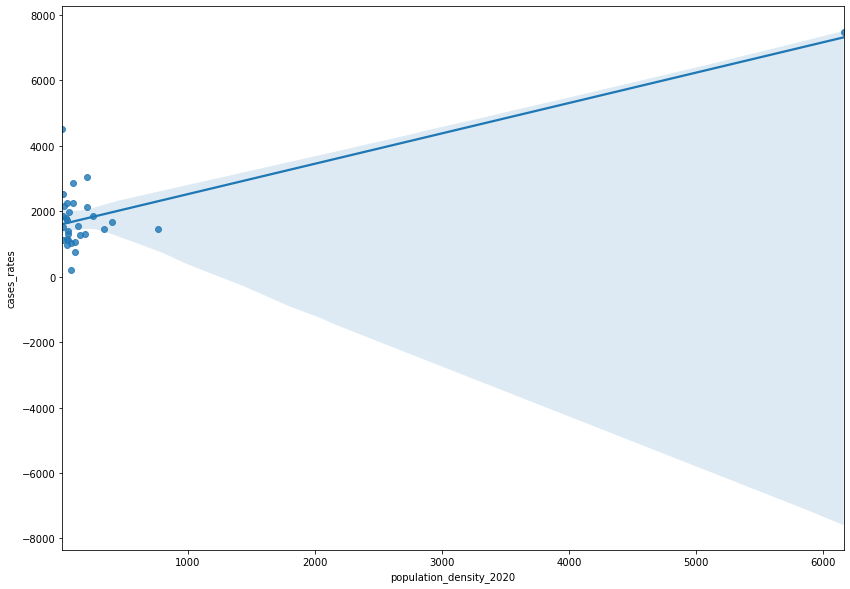

In [11]:
plt.figure(figsize=(14,10))
sns.regplot(x="population_density_2020", y="cases_rates", data=dfAll) 
sns.set_context('paper', font_scale=2)

#### Populate Density vs Deaths Rate - Regression Plot 

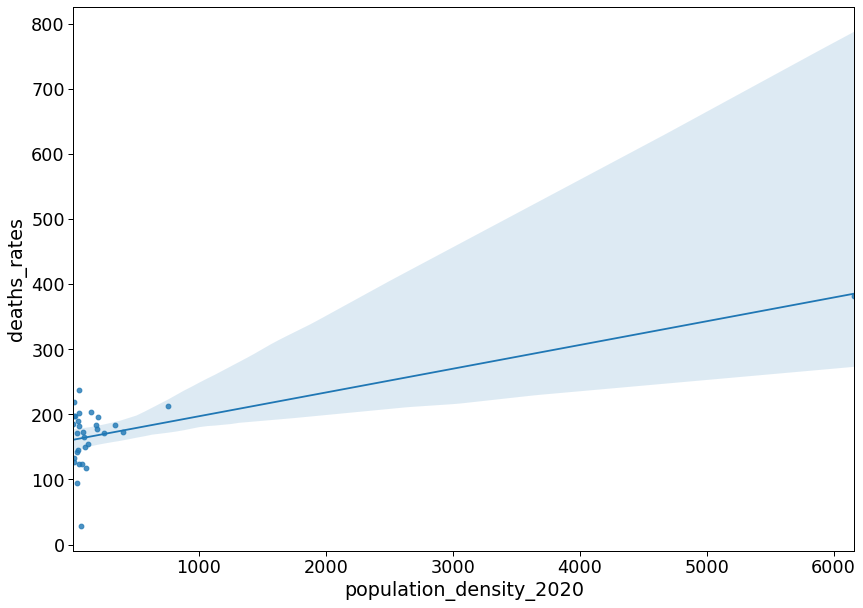

In [12]:
plt.figure(figsize=(14,10))
sns.regplot(x="population_density_2020", y="deaths_rates", data=dfAll) 
sns.set_context('paper', font_scale=2)

#### Populate Density, Cases Rate, Deaths Rate - Pairs Plot 

<Figure size 1080x864 with 0 Axes>

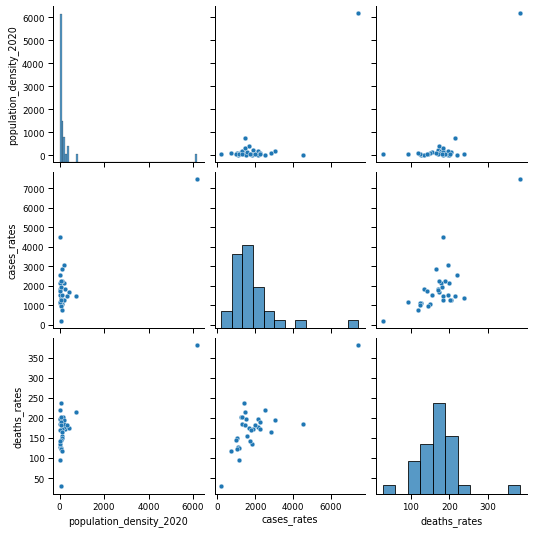

In [17]:
dfpairc=dfAll[["population_density_2020", "cases_rates", "deaths_rates"]]
plt.figure(figsize=(15,12))
sns.pairplot(dfpairc)
sns.set_context('paper', font_scale=1)

#### Descriptive statistics (Populate Density, Cases Rate, Deaths Rate)

In [14]:
dfAll["population_density_2020"].describe()

count      31.000000
mean      318.980645
std      1095.217300
min        10.800000
25%        44.050000
50%        75.600000
75%       170.000000
max      6163.300000
Name: population_density_2020, dtype: float64

In [15]:
dfAll["cases_rates"].describe()

count      31.000000
mean     1895.497398
std      1307.876457
min       210.510077
25%      1216.758183
50%      1554.856187
75%      2142.972506
max      7469.703043
Name: cases_rates, dtype: float64

In [16]:
dfAll["deaths_rates"].describe()

count     31.000000
mean     172.270353
std       56.926831
min       28.881222
25%      143.279937
50%      173.674133
75%      196.200665
max      382.108399
Name: deaths_rates, dtype: float64